# Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm on a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [1]:
from   scipy             import stats 
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [29]:
GPU1 = np.array([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = np.array([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

**First T test**

*One sample t-test*

Check if the mean of the GPU1 is equal to zero.
- Null Hypothesis is that mean is equal to zero.
- Alternate hypothesis is that it is not equal to zero.

In [27]:
from scipy.stats import ttest_1samp

GPU1_mean = np.mean(GPU1)
GPU2_mean = np.mean(GPU2)

print("GPU 1 mean:", GPU1_mean)
print("GPU 2 mean:", GPU2_mean)
print("\n")

h1 = ttest_1samp(GPU1, 0)
h2 = ttest_1samp(GPU2, 0)

print(h1)
print(h2)

GPU 1 mean: 10.333333333333334
GPU 2 mean: 11.466666666666667


Ttest_1sampResult(statistic=34.056241516158195, pvalue=7.228892044970457e-15)
Ttest_1sampResult(statistic=37.406459913272236, pvalue=1.969680571681882e-15)


## Question 2

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [43]:
from scipy.stats import ttest_ind

ttest, pvalue = stats.ttest_ind(GPU1,GPU2)

print("ttest:", ttest, "pvalue:", pvalue)

if pvalue < 0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

ttest: -2.627629513471839 pvalue: 0.013794282041452725
we reject null hypothesis


## Question 3

He is trying a third GPU - GPU3.

In [44]:
GPU3 = np.array([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

In [45]:
from scipy.stats import ttest_ind

ttest, pvalue = stats.ttest_ind(GPU1,GPU3)

print("ttest:", ttest, "pvalue:", pvalue)

if pvalue < 0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

ttest: -1.4988943759093303 pvalue: 0.14509210993138993
we accept null hypothesis


## ANOVA

## Question 4 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [4]:
import numpy as np

e1 = np.array([1.595440,1.419730,0.000000,0.000000])
e2 = np.array([1.433800,2.079700,0.892139,2.384740])
e3 = np.array([0.036930,0.938018,0.995956,1.006970])

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed

Perform levene test on the data

The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

source: scipy.org

#### Answer:

In [5]:
# Lets collect try to analyze data by plotting
results = pd.DataFrame()

df1            = pd.DataFrame({'R': '1', 'Result':e1})
df2            = pd.DataFrame({'R': '2', 'Result':e2})
df3            = pd.DataFrame({'R': '3', 'Result':e3})

results = results.append(df1)
results = results.append(df2) 
results = results.append(df3) 

C:\Users\del15\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\del15\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


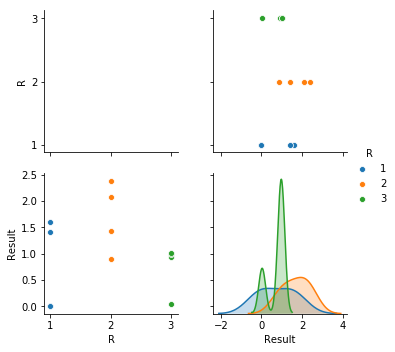

In [6]:
sns.pairplot(results,diag_kind='kde',hue='R')

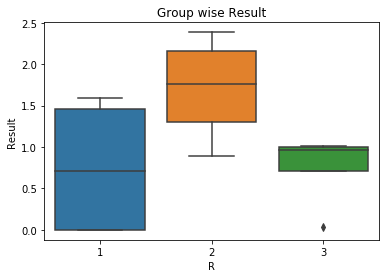

In [7]:
sns.boxplot(x = "R", y = "Result", data = results)
plt.title('Group wise Result')
plt.show()

## Question 5

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

use stats.f_oneway() module to perform one-way ANOVA test

In [47]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('R ~ Result', data = df1).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df         F    PR(>F)
Result    2.820485e-32  1.0  0.572062  0.528392
Residual  9.860761e-32  2.0       NaN       NaN


In [55]:
mod = ols('R ~ Result', data = df2).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq   df         F    PR(>F)
Result    3.706622e-32  1.0  1.202868  0.387171
Residual  6.162976e-32  2.0       NaN       NaN


## Question 6

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

answer here

## Question 7 

You are a manager of a chinese restaurant. You want to determine whether the waiting time to place an order has changed in the past month from its previous population mean value of 4.5 minutes. 
State the null and alternative hypothesis.

#### Answer:


answer here

## Chi square test

## Question 8

Let's create a small dataset for dice rolls of four players

In [8]:
import numpy as np
# Here d1 to d6 are the number of dice and four values in each dice represents value of dice for player 1 to player 4

d1 = [1, 6, 3, 4]
d2 = [2, 5, 1, 3]
d3 = [4, 2, 3, 1]
d4 = [3, 4, 1, 2]
d5 = [1, 6, 3, 5]
d6 = [3, 2, 2, 1]

dice = np.array([d1, d2, d3, d4, d5, d6])

run the test using SciPy Stats library

Depending on the test, we are generally looking for a threshold at either 0.05 or 0.01. Our test is significant (i.e. we reject the null hypothesis) if we get a p-value below our threshold.

For our purposes, we’ll use 0.01 as the threshold.

use stats.chi2_contingency() module 

This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

Print the following:

- chi2 stat
- p-value
- degree of freedom
- contingency



## Question 9

### Z-test

Get zscore on the above dice data using stats.zscore module from scipy. Convert zscore values to p-value and take mean of the array.

## Question 10

A Paired sample t-test compares means from the same group at different times.

The basic two sample t-test is designed for testing differences between independent groups. 
In some cases, you might be interested in testing differences between samples of the same group at different points in time. 
We can conduct a paired t-test using the scipy function stats.ttest_rel(). 

In [9]:
before= stats.norm.rvs(scale=30, loc=100, size=500) ## Creates a normal distribution with a mean value of 100 and std of 30
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=500)

Test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment using above data.